In [22]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pathlib
import json
import logistic
from analysis_utils import ExprMgr
import shutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
style={ 0:'--', 1: '-', 3:':', 4:'dashdot',  2:'-', -1:'-', 5:'-'}
color={ 0:'C2', 1: 'C3', 3: 'C0', 4:'C1', -1:'C4', 2:'C5', 5:'purple'}
name={-1:'Naïve FᴇᴅAᴄ', 0:'FᴇᴅAᴠɢ', 1:'FᴇᴅAᴄ', 2:'FᴇᴅAᴄ-II', 3:'Mʙ-Sɢᴅ', 4: 'Mʙ-Aᴄ-Sɢᴅ', 5:'Linear'}
marker={ 0: '.', 1: '*', 2: 'p', 3:'^', 4: 'P', -1: 'x', 5:'o'}
fig_path = pathlib.Path('./fig')
ylabel = 'Best Suboptimality'

In [24]:
dataset, lambd, optimum = "a9a", 1e-2, 0.3727237615595949
expr_mgr = ExprMgr(dataset, lambd)
df = expr_mgr.get_data_frame(reload=False)

K_lst = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
M_lst = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192])
eta_lst = [0.001, 0.002, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
df = df.loc[df['eta'].isin(eta_lst)]

ylim = (1e-6,1e-2)
alg_lst = np.array([3, 4, 0, 1])
M_sublst = M_lst[2:]

In [36]:
dataset, lambd, optimum = "a9a", 1e-3, 0.3333407530091771
expr_mgr = ExprMgr(dataset, lambd)
df = expr_mgr.get_data_frame(reload=True)

K_lst = df.K.unique() #np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
M_lst = df.M.unique() #np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192])
eta_lst = df.eta.unique() #[0.001, 0.002, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
# df = df.loc[df['eta'].isin(eta_lst)]
alg_lst = df.alg.unique() #np.array([3, 4, 0, 1])

print(alg_lst)
print(K_lst)
print(M_lst)
print(eta_lst)

ylim = (1e-5,1e-1)

# M_sublst = M_lst[2:]
K_sublst = K_lst
M_sublst = M_lst #[2:]

[1 2 0 5]
[2 1 4]
[2 1 8 4]
[0.02 0.01 0.05]


In [6]:
dataset, lambd, optimum = "a9a", 1e-4, 0.3245069255709821
expr_mgr = ExprMgr(dataset, lambd)
df = expr_mgr.get_data_frame(reload=False)

K_lst = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
M_lst = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024,2048,4096,8192])

eta_lst = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]
df = df.loc[((df['eta'].isin(eta_lst)))]

ylim = (1e-4,1e-1)
alg_lst = [4, 1, -1]
M_sublst = M_lst[4:]

In [7]:
dataset, lambd, optimum = "epsilon", 1e-4, 0.47130400753628965
expr_mgr = ExprMgr(dataset, lambd)
df = expr_mgr.get_data_frame(reload=False)

K_lst = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
M_lst = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192])

eta_lst = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]
df = df.loc[((df['eta'].isin(eta_lst)))]

ylim = (1e-5, 1e-1)
alg_lst = [3, 4, 0, 1]


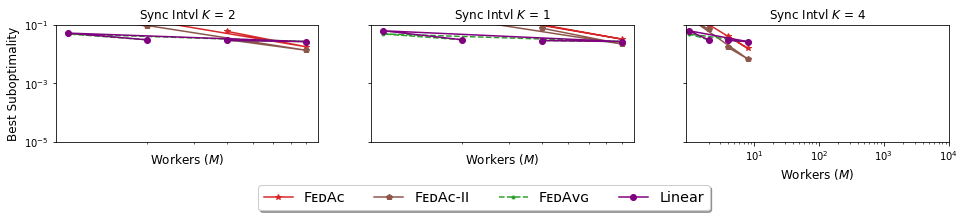

In [38]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16, 2.9))
# K_sublst = [1, 8, 32, 64, 128, 256]

for axid, K in enumerate(K_sublst):
    ax = axes[axid]
    for lineid, alg in enumerate(alg_lst):
        if alg==5:
            print
        subopt_lst = []
        for M in M_sublst:
#             print(M,K,alg)
            subopt = min(df.loc[(df['M']==M) & \
                            (df['K']==K) & \
                            (df['alg']==alg)].best_loss)-optimum
            subopt_lst.append(subopt)
        ax.loglog(M_sublst, subopt_lst, color=color[alg], linestyle=style[alg], marker=marker[alg], label=name[alg])
    ax.set_xlabel('Workers ($M$)', fontsize='large')
    ax.set_title(f'Sync Intvl $K$ = {K}', fontsize='large')
    ax.set_ylim(ylim)
    ax.set_xticks([1e1, 1e2, 1e3, 1e4])

axes[0].set_ylabel(ylabel, fontsize='large')
fig.subplots_adjust(bottom=0.32)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.42, -0.022), fancybox=True, ncol=len(alg_lst), shadow=True, fontsize='x-large')
fig.savefig(fig_path / f'{expr_mgr.get_name()}_M_6blocks.pdf', bbox_inches= 'tight')


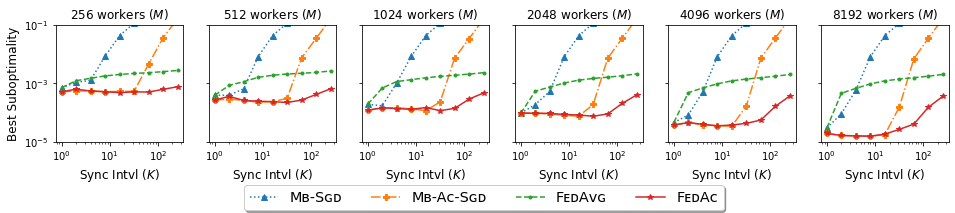

In [320]:
n_col = 6
fig, axes = plt.subplots(1, n_col, sharex=True, sharey=True, figsize=(16, 2.9))
M_sub_lst = M_lst[-(n_col)*1::1]

for axid, M in enumerate(M_sub_lst):
    ax = axes[axid]
    for lineid, alg in enumerate(alg_lst):
        subopt_lst = []
        for K in K_lst[:]:
            subopt = min(df.loc[(df['M']==M) & \
                            (df['K']==K) & \
                            (df['alg']==alg)].best_loss-optimum)
            subopt_lst.append(subopt)
        ax.loglog(K_lst[:], subopt_lst, color=color[alg], marker=marker[alg], linestyle=style[alg],  label=name[alg])
    # ax.legend()
    ax.set_xlabel('Sync Intvl ($K$)', fontsize='large')
    ax.set_title(f'{M} workers ($M$)', fontsize='large')
    ax.set_ylim(ylim)

axes[0].set_ylabel(ylabel, fontsize='large')

fig.subplots_adjust(bottom=0.32)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.42, -0.022), fancybox=True, ncol=len(alg_lst), shadow=True, fontsize='x-large')
fig.savefig(fig_path / f'{expr_mgr.get_name()}_K_6blocks.pdf', bbox_inches= 'tight')